#**Load CSV file created after part 1**

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_name = "/content/amazon_sponsored_products.csv"
df = pd.read_csv(file_name)
df.head()


,Title,Brand,Reviews,Rating,Selling Price,Image URL,Product URL
0,Meera Adorable Cat Frog Plush - The for Meow-M...,NaN,M.R.P:,NaN,"3,499",https://m.media-amazon.com/images/I/51+bfXg505...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Meera Pink Astronaut Soft Plush Toy Blast Off ...,NaN,2,5.0,999,https://m.media-amazon.com/images/I/51p9rXrHtM...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Krow Baby Plushies - 50 cm Blue Lovable Huggab...,NaN,5,5.0,"1,198",https://m.media-amazon.com/images/I/61tmTIwEdn...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,Meera Cute Bear Plush Soft Toy Stuffed Animal ...,NaN,1,1.0,"1,499",https://m.media-amazon.com/images/I/61lHZ-6iqG...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,YIQELU Breathing Teddy Otter Glowing Music for...,NaN,7,5.0,898,https://m.media-amazon.com/images/I/61ltepxRmJ...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...


#**Data Cleaning & Preparation**

1. **Clean the data**:
    - Remove duplicates.
    - Ensure price, reviews, and ratings are in numerical format.
    - Standardize any inconsistent values (ex: remove ₹ symbols).
2. **Prepare the data** for analysis by:
    - Converting relevant columns to appropriate data types.
    - Handling any missing or corrupted values.

In [2]:

df.drop_duplicates(inplace=True)

df['Selling Price'] = df['Selling Price'].astype(str).str.replace(',', '').str.extract('(\d+)')
df['Selling Price'] = pd.to_numeric(df['Selling Price'], errors='coerce')

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


df['Brand'] = df.apply(lambda row: row['Title'].split()[0] if pd.isna(row['Brand']) or row['Brand'] == "Unknown" else row['Brand'], axis=1)


df.dropna(subset=['Selling Price', 'Rating', 'Reviews'], inplace=True)

#Brand Performance Analysis

<ipython-input-3-c051b3df756e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='Blues')


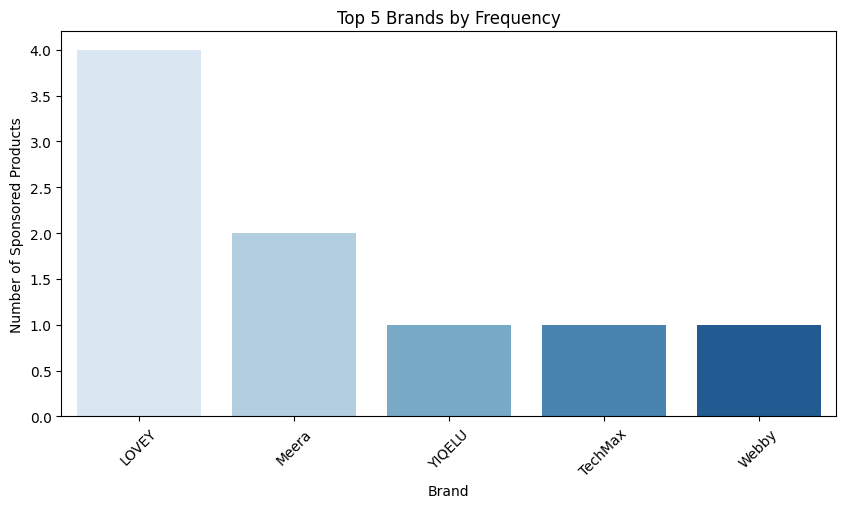

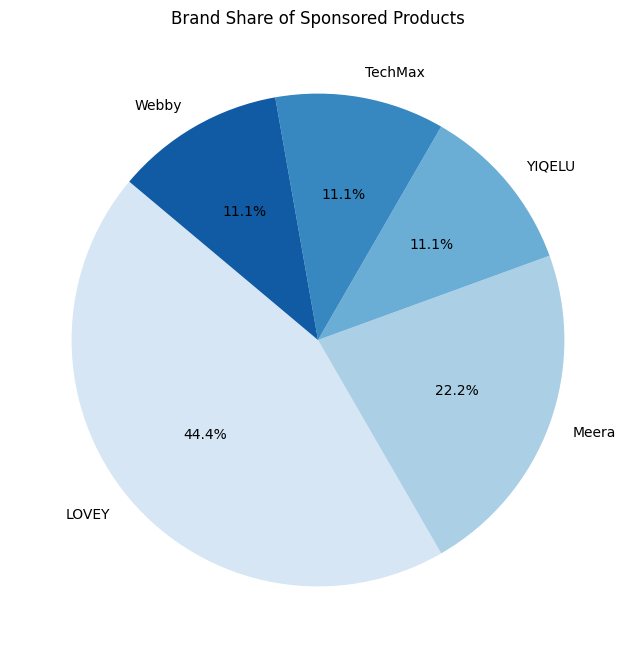

In [3]:

# Brand Frequency
brand_counts = df['Brand'].value_counts().head(5)

# Average Rating by Brand
brand_avg_rating = df.groupby('Brand')['Rating'].mean().dropna().sort_values(ascending=False).head(5)

# Plot Brand Frequency
plt.figure(figsize=(10,5))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='Blues')
plt.xlabel("Brand")
plt.ylabel("Number of Sponsored Products")
plt.title("Top 5 Brands by Frequency")
plt.xticks(rotation=45)
plt.show()

# Pie Chart: Brand Share
plt.figure(figsize=(8,8))
plt.pie(brand_counts.values, labels=brand_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Blues', len(brand_counts)))
plt.title("Brand Share of Sponsored Products")
plt.show()


#Price vs. Rating Analysis

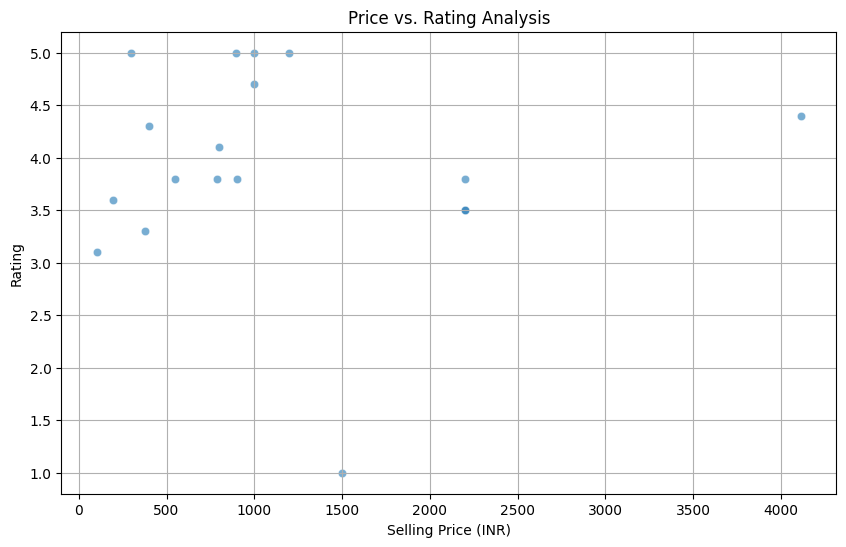

<ipython-input-4-d59bac812c8e>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_rating = df.groupby('Rating Range')['Selling Price'].mean().dropna()
<ipython-input-4-d59bac812c8e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_rating.index, y=avg_price_by_rating.values, palette='Greens')


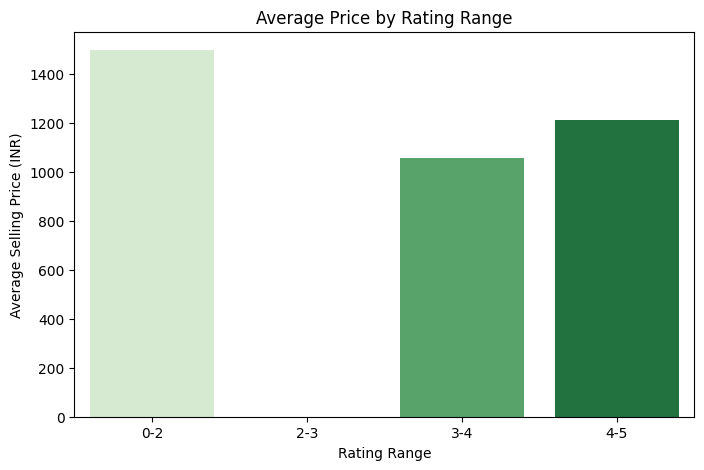

In [4]:

# Scatter Plot: Price vs Rating
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Selling Price'], y=df['Rating'], alpha=0.6)
plt.xlabel("Selling Price (INR)")
plt.ylabel("Rating")
plt.title("Price vs. Rating Analysis")
plt.grid(True)
plt.show()

# Average Price by Rating Range
df['Rating Range'] = pd.cut(df['Rating'], bins=[0, 2, 3, 4, 5], labels=["0-2", "2-3", "3-4", "4-5"])
avg_price_by_rating = df.groupby('Rating Range')['Selling Price'].mean().dropna()

# Bar Chart: Average Price by Rating Range
plt.figure(figsize=(8,5))
sns.barplot(x=avg_price_by_rating.index, y=avg_price_by_rating.values, palette='Greens')
plt.xlabel("Rating Range")
plt.ylabel("Average Selling Price (INR)")
plt.title("Average Price by Rating Range")
plt.show()


#Review & Rating Distribution

<ipython-input-5-77677647aa5e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_reviewed_products['Title'], x=top_reviewed_products['Reviews'], palette='Purples')


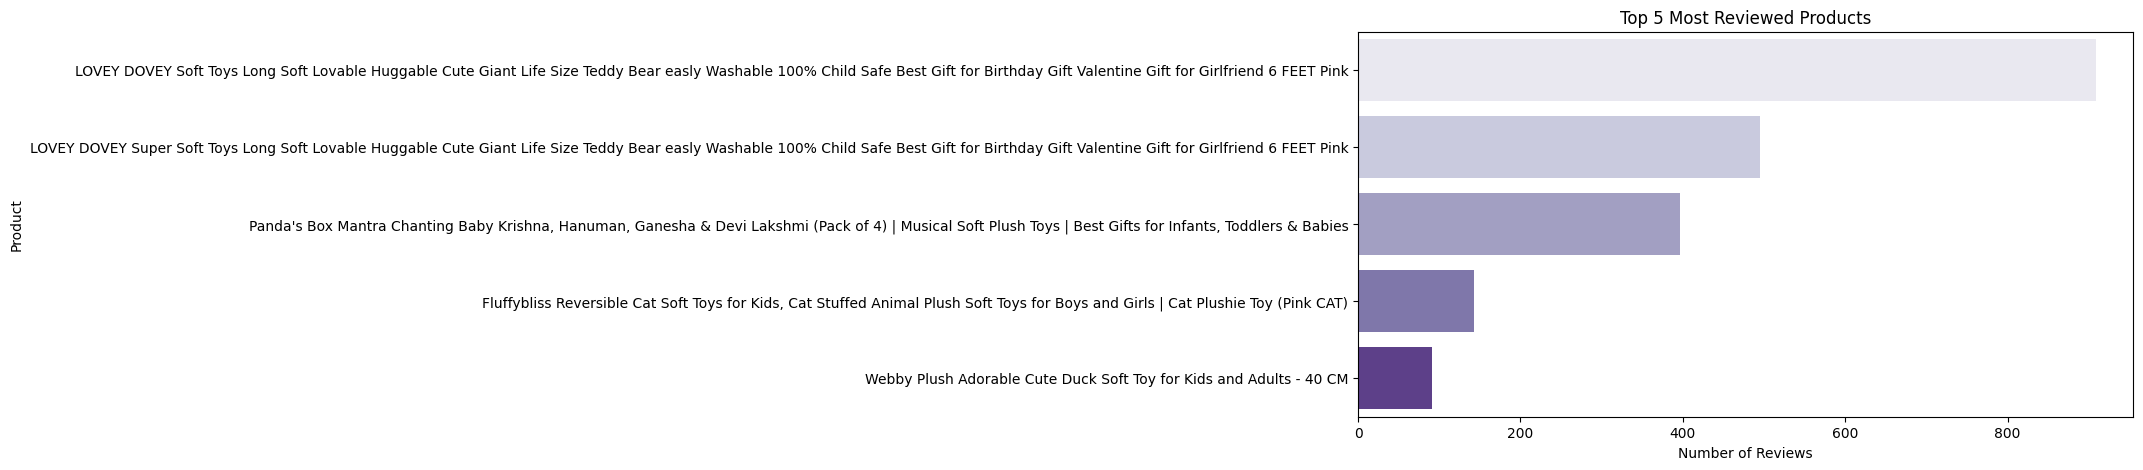

<ipython-input-5-77677647aa5e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_rated_products['Title'], x=top_rated_products['Rating'], palette='Oranges')


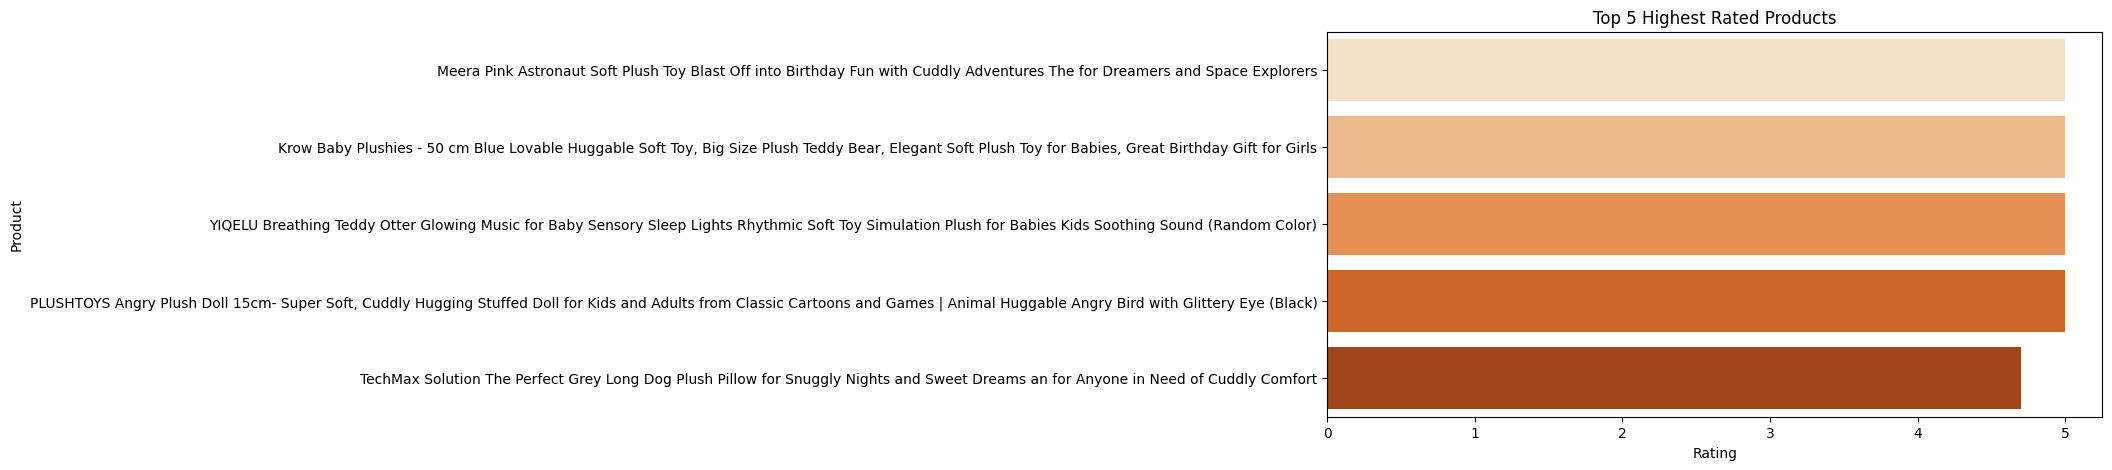

(                                                Title  Reviews  Rating  \
 10  LOVEY DOVEY Soft Toys Long Soft Lovable Huggab...    909.0     3.8   
 14  LOVEY DOVEY Super Soft Toys Long Soft Lovable ...    495.0     3.5   
 16  Panda's Box Mantra Chanting Baby Krishna, Hanu...    396.0     4.4   
 17  Fluffybliss Reversible Cat Soft Toys for Kids,...    143.0     3.6   
 6   Webby Plush Adorable Cute Duck Soft Toy for Ki...     91.0     3.3   
 
     Selling Price  
 10           2199  
 14           2199  
 16           4115  
 17            195  
 6             379  ,
                                                 Title  Reviews  Rating  \
 1   Meera Pink Astronaut Soft Plush Toy Blast Off ...      2.0     5.0   
 2   Krow Baby Plushies - 50 cm Blue Lovable Huggab...      5.0     5.0   
 4   YIQELU Breathing Teddy Otter Glowing Music for...      7.0     5.0   
 22  PLUSHTOYS Angry Plush Doll 15cm- Super Soft, C...      1.0     5.0   
 5   TechMax Solution The Perfect Grey Long Do

In [5]:

# Top 5 Most Reviewed Products
top_reviewed_products = df.nlargest(5, 'Reviews')[['Title', 'Reviews', 'Rating', 'Selling Price']]

# Top 5 Highest Rated Products
top_rated_products = df.nlargest(5, 'Rating')[['Title', 'Reviews', 'Rating', 'Selling Price']]

# Bar Chart: Top 5 Reviewed Products
plt.figure(figsize=(10,5))
sns.barplot(y=top_reviewed_products['Title'], x=top_reviewed_products['Reviews'], palette='Purples')
plt.xlabel("Number of Reviews")
plt.ylabel("Product")
plt.title("Top 5 Most Reviewed Products")
plt.show()

# Bar Chart: Top 5 Highest Rated Products
plt.figure(figsize=(10,5))
sns.barplot(y=top_rated_products['Title'], x=top_rated_products['Rating'], palette='Oranges')
plt.xlabel("Rating")
plt.ylabel("Product")
plt.title("Top 5 Highest Rated Products")
plt.show()

# Display results
top_reviewed_products, top_rated_products